# Train test split


In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn import  metrics

Rozważmy następujący zbiór punktów:

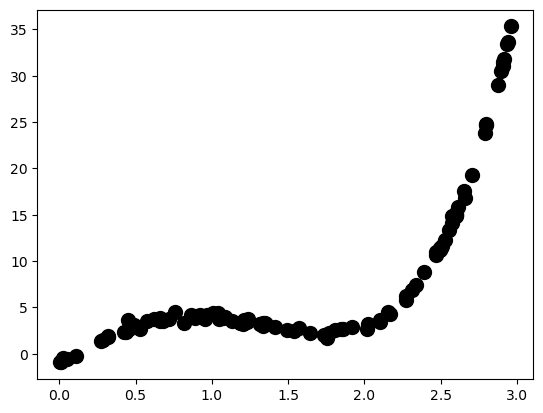

In [3]:
x = stats.uniform(0,3).rvs(100)
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
y = f(x) + stats.norm(0,0.3).rvs(len(x))
plt.plot(x, y, 'ok', ms=10);
plt.show()

# Przykład
Podziel zbiór danych na część testową i treningową. 
Naucz model na części treningowej i ocen wyniki na części testowej.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60,) (60,)
(40,) (40,)


In [5]:
X_train=np.vstack(X_train)
X_test=np.vstack(X_test)

In [6]:
model2 = make_pipeline(PolynomialFeatures(30), linear_model.LinearRegression())
model2.fit(X_train, y_train)
model2.predict(X_test)

array([ 3.14092358, 15.25226454,  3.27449523,  4.17926792,  2.40045057,
        5.91890482, -0.70289457,  2.41873637,  4.11043433,  2.60285635,
        3.84592679,  3.16089741,  3.47953367,  3.86843468, 33.28392462,
        2.5078402 ,  2.81036349, 17.43744711,  3.90961916,  2.74943128,
        3.66922195,  0.03982203,  3.68813218,  4.087653  ,  8.2282863 ,
        3.18425962, 11.3670936 ,  4.08457349,  4.01576054,  7.17820708,
        4.11973334, 10.37937454,  2.58322979,  3.51385417,  1.49648164,
        3.22456611,  3.72456157, 14.13717608, -0.87260167,  3.46130357])

In [7]:
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model2.predict(X_test)) ))
print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model2.predict(X_test)) ))
print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model2.predict(X_test)) ))

Explained variance score: 0.9970206517031228
Explained variance score: 0.9970206517031228
Median absolute error: 0.20094208440267897
Mean squared error: 0.10661626312157355
Mean absolute errors: 0.2455362016241355


# Zadanie
Wylicz powyższe miary dla wszytkich modeli:

- regrsji linowej
- regrsji wielomianowej stopnia 2
- regrsji wielomianowej stopnia 3
- regrsji wielomianowej stopnia 4
- regrsji wielomianowej stopnia 5
- regrsji wielomianowej stopnia 25

In [14]:
r2s = []
medAEs = []
MSEs = []
MAEs = []
degrees = [1, 2, 3, 4, 5, 25]
for deg in degrees:
    model = make_pipeline(PolynomialFeatures(deg), linear_model.LinearRegression())
    model.fit(X_train, y_train)
    r2s.append(metrics.explained_variance_score(y_test, model.predict(X_test)))
    medAEs.append(metrics.median_absolute_error(y_test, model.predict(X_test)))
    MSEs.append(metrics.mean_squared_error(y_test, model.predict(X_test)))
    MAEs.append(metrics.mean_absolute_error(y_test, model.predict(X_test)))

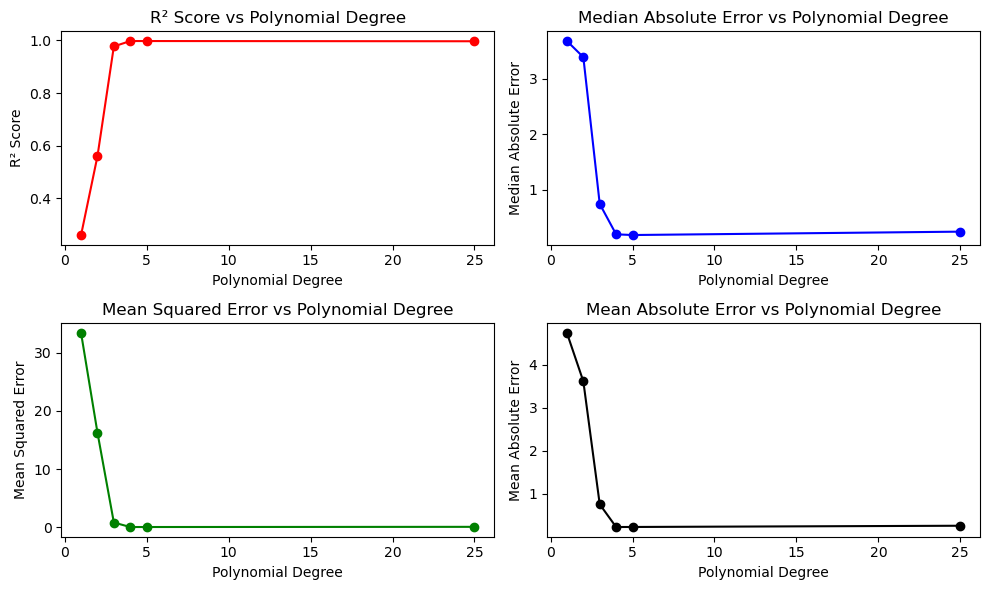

In [15]:
plt.figure(figsize=(10, 6))
plt.subplot(221)
plt.plot(degrees, r2s, 'ro-')
plt.title('R² Score vs Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')

plt.subplot(222)
plt.plot(degrees, medAEs, 'bo-')
plt.title('Median Absolute Error vs Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Median Absolute Error')

plt.subplot(223)
plt.plot(degrees, MSEs, 'go-')
plt.title('Mean Squared Error vs Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')

plt.subplot(224)
plt.plot(degrees, MAEs, 'ko-')
plt.title('Mean Absolute Error vs Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Absolute Error')

plt.tight_layout()
plt.show()